# EDA & Data Manipulation part 2 

## Import packages

In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sbn

## Read  and merge the data

In [2]:
path = '../../data/raw'
training_values = pd.read_csv(path + '/TrainingSetValues.csv')
training_labels = pd.read_csv(path + '/TrainingSetLabels.csv')
testing = pd.read_csv(path + '/TestSetValues.csv')

training = pd.merge(training_values, training_labels, how='inner', on='id')
print (list(training.columns.values)) # column names of df
training.head(5)

['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## EDA: Population to Management Group Type

In [3]:
start_col = training.columns.get_loc('population')
end_col = training.columns.get_loc('management_group')

training_EDA_2 = pd.concat([training.iloc[:,0:1], training.iloc[:,start_col: end_col+1], training.iloc[:,40:41]], axis=1)
print (training_EDA_2.shape)
training_EDA_2.head(5)

(59400, 14)


,id,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,status_group
0,69572,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,functional
1,8776,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,functional
2,34310,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,functional
3,67743,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,non functional
4,19728,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,functional


## Change data types and check NA

In [4]:
# EDA

## check data types
print (training_EDA_2.dtypes)

## change non-int data types to categorical/boolean
for col in ['recorded_by', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'status_group']:
    training_EDA_2[col] = training_EDA_2[col].astype('category')
    
for col in ['public_meeting', 'permit']:
    training_EDA_2[col] = training_EDA_2[col].astype('bool')

# check number of NA's
print (training_EDA_2.isnull().sum())
    
training_EDA_2.describe(include = 'all')

id                        int64
population                int64
public_meeting           object
recorded_by              object
scheme_management        object
scheme_name              object
permit                   object
construction_year         int64
extraction_type          object
extraction_type_group    object
extraction_type_class    object
management               object
management_group         object
status_group             object
dtype: object
id                           0
population                   0
public_meeting               0
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
status_group                 0
dtype: int64


,id,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,status_group
count,59400.000000,59400.000000,59400,59400,55523,31234,59400,59400.000000,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,2,1,12,2696,2,NaN,18,13,7,12,5,3
top,NaN,NaN,True,GeoData Consultants Ltd,VWC,K,True,NaN,gravity,gravity,gravity,vwc,user-group,functional
freq,NaN,NaN,54345,59400,36793,682,41908,NaN,26780,26780,26780,40507,52490,32259
mean,37115.131768,179.909983,NaN,NaN,NaN,NaN,NaN,1300.652475,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,471.482176,NaN,NaN,NaN,NaN,NaN,951.620547,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,37061.500000,25.000000,NaN,NaN,NaN,NaN,NaN,1986.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,55656.500000,215.000000,NaN,NaN,NaN,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Create list for columns not needed

In [5]:
cols_to_eliminate = []

# recorded by has all "GeoData Consultants Ltd", scheme_name has too many NA's
cols_to_eliminate.append('recorded_by')
cols_to_eliminate.append('scheme_name')

## Check correlation

In [8]:
temp_1 = training_EDA_2
cor = temp_1.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
print (cor)
# extraction types columns and management columns are highly correlated

# correlation = training_EDA_2.corr(method='pearson')
# print (correlation) # seems fine

                             id  population  public_meeting  recorded_by  \
id                     1.000000    0.033092       -0.003919          NaN   
population             0.033092    1.000000       -0.010421          NaN   
public_meeting        -0.003919   -0.010421        1.000000          NaN   
recorded_by                 NaN         NaN             NaN          NaN   
scheme_management      0.001376    0.069150        0.066535          NaN   
scheme_name            0.059323    0.016461       -0.041509          NaN   
permit                 0.001346    0.008192       -0.117993          NaN   
construction_year      0.000490    0.140663       -0.025591          NaN   
extraction_type        0.000608   -0.007782        0.061038          NaN   
extraction_type_group -0.000853   -0.008839        0.039797          NaN   
extraction_type_class -0.004088   -0.023502        0.048189          NaN   
management            -0.001139    0.065192        0.121890          NaN   
management_g

## Check population

21381


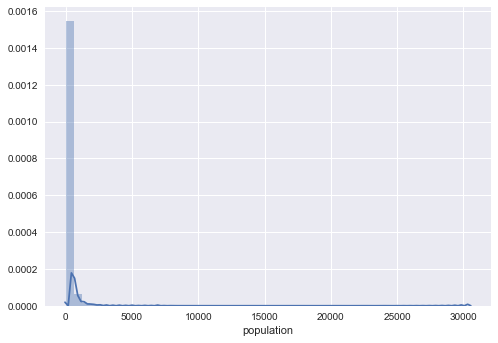

In [9]:
print (len(training_EDA_2[training_EDA_2['population'] == 0])) # 21381 has length 0
ax = sbn.distplot(training_EDA_2['population'])
plt.show()

# currently leave it as now

In [14]:
# check status group with population = 0
training_EDA_2[training_EDA_2['population'] == 0].groupby('status_group').size()

status_group
functional                 11274
functional needs repair     1775
non functional              8332
dtype: int64

status_group
functional                 187.553303
functional needs repair    175.102154
non functional             170.016430
Name: population, dtype: float64


E:\coding\Anaconda\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


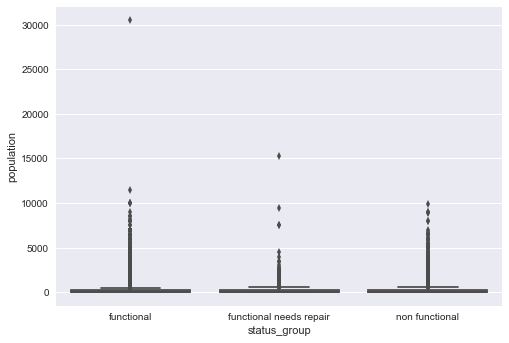

In [10]:
print(training_EDA_2.groupby(['status_group'])['population'].mean()) # no significant correlation between status group and population

ax = sbn.boxplot(x = training_EDA_2['status_group'], y = training_EDA_2['population'])
plt.show()

## Check scheme management

In [15]:
s_m = training_EDA_2.groupby(['scheme_management', 'status_group']).size()

print (s_m)
print (s_m / s_m.groupby(level=0).sum())

# for scheme management, aggregate Company, None, Other, Parastatal, Private Operator, SWC, Trust as "Other"
s_m_set = ['Company', 'None', 'Other', 'Parastatal', 'Private operator', 'SWC', 'Trust', 'NaN']
# training_EDA_2['scheme_management_2'] = training_EDA_2['scheme_management']
training_EDA_2['scheme_management_2'] = np.where((training_EDA_2['scheme_management'].isin(s_m_set))|training_EDA_2['scheme_management'].isnull(), 
                                                 'Other', training_EDA_2['scheme_management'])

print (training_EDA_2[['scheme_management', 'scheme_management_2']]) # seems right
print (training_EDA_2.groupby(['scheme_management_2']).size())

cols_to_eliminate.append('scheme_management')

scheme_management  status_group           
Company            functional                   534
                   functional needs repair       37
                   non functional               490
None               functional                     1
Other              functional                   458
                   functional needs repair       22
                   non functional               286
Parastatal         functional                   966
                   functional needs repair      202
                   non functional               512
Private operator   functional                   729
                   functional needs repair       23
                   non functional               311
SWC                functional                    20
                   functional needs repair        1
                   non functional                76
Trust              functional                    46
                   functional needs repair        5
                   no

## Check scheme name

In [16]:
print (training_EDA_2.groupby(['scheme_name']).size().sort_values(ascending = False)) ## does not have good info

cols_to_eliminate.append('scheme_name')

scheme_name
K                                        682
None                                     644
Borehole                                 546
Chalinze wate                            405
M                                        400
DANIDA                                   379
Government                               320
Ngana water supplied scheme              270
wanging'ombe water supply s              261
wanging'ombe supply scheme               234
I                                        229
Bagamoyo wate                            229
Uroki-Bomang'ombe water sup              209
N                                        204
Kirua kahe gravity water supply trust    193
Machumba estate pipe line                185
Makwale water supplied sche              166
Kijiji                                   161
S                                        154
Losaa-Kia water supply                   152
mtwango water supply scheme              152
Handeni Trunk Main(H                     15

## Check construction year

In [54]:
print (len(training_EDA_2[training_EDA_2['construction_year'] == 0])) # 20709 obs has construction year 0

print (len(training_EDA_2[(training_EDA_2['construction_year'] == 0) & (training_EDA_2['population'] == 0)])) # 20109 has both construction year and population be 0!

20709
20034


### 20709 obs have construction year as 0, and 20034 obs have both construction year and population be 0
### ways to impute: if 0 use average of construction year or avg of population, or something?

## Check Extraction Types

In [17]:
e_type = training_EDA_2[['extraction_type', 'extraction_type_group', 'extraction_type_class']]
print (e_type.describe(include = 'all'))

e_type.groupby(['extraction_type_class', 'extraction_type_group', 'extraction_type']).size()

       extraction_type extraction_type_group extraction_type_class
count            59400                 59400                 59400
unique              18                    13                     7
top            gravity               gravity               gravity
freq             26780                 26780                 26780


extraction_type_class  extraction_type_group  extraction_type          
gravity                gravity                gravity                      26780
handpump               afridev                afridev                       1770
                       india mark ii          india mark ii                 2400
                       india mark iii         india mark iii                  98
                       nira/tanira            nira/tanira                   8154
                       other handpump         other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
                       swn 80                 swn 80                        3670
motorpump              mono                   mono                          2865
                       other motorpum

### The extraction types look fine. We do not need to eliminate anything. Just decide how detailed we want when modeling

## Check Management

In [18]:
m_type = training_EDA_2[['management', 'management_group','scheme_management']]
print (m_type.describe(include = 'all')) # scheme management "VWC" is different than "VWC" of management!

print (m_type.groupby(['management_group', 'scheme_management']).size())
print ('--------------------------------------------------------------')
print (m_type.groupby(['management_group', 'management']).size())

       management management_group scheme_management
count       59400            59400             55523
unique         12                5                12
top           vwc       user-group               VWC
freq        40507            52490             36793
management_group  scheme_management
commercial        Company                898
                  Other                   84
                  Parastatal              60
                  Private operator       971
                  Trust                   64
                  VWC                    172
                  WUA                    196
                  WUG                     11
                  Water Board              6
                  Water authority       1053
other             Company                  2
                  Other                  519
                  Private operator         4
                  SWC                     87
                  VWC                     61
                  WUA   

### Decide to trust management rather than scheme management, and will just put unknown into other group

In [19]:
cols_to_eliminate.append('scheme_management_2')

training_EDA_2['management_group_2'] = np.where((training_EDA_2['management_group'] == 'unknown'), 
                                                 'other', training_EDA_2['management_group'])
print (training_EDA_2.groupby(['management_group_2', 'management']).size())
cols_to_eliminate.append('management_group')

management_group_2  management      
commercial          company               685
                    private operator     1971
                    trust                  78
                    water authority       904
other               other                 844
                    other - school         99
                    unknown               561
parastatal          parastatal           1768
user-group          vwc                 40507
                    water board          2933
                    wua                  2535
                    wug                  6515
dtype: int64


## Now drop columns

In [20]:
print (cols_to_eliminate)

training_EDA_2_f = training_EDA_2.drop(cols_to_eliminate, axis=1)
training_EDA_2_f = training_EDA_2_f[['id', 'population', 'public_meeting', 
                                     'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 
                                     'extraction_type_class', 'management', 'management_group_2', 'status_group']] # reorder columns

['recorded_by', 'scheme_name', 'scheme_management', 'scheme_name', 'scheme_management_2', 'management_group']


In [21]:
print (training_EDA_2_f.head(5))
print (training_EDA_2_f.shape)

      id  population  public_meeting  permit  construction_year  \
0  69572         109            True   False               1999   
1   8776         280            True    True               2010   
2  34310         250            True    True               2009   
3  67743          58            True    True               1986   
4  19728           0            True    True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group_2    status_group  
0         user-group      functional  
1         user-group      functional  
2         user-group   